In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
import seaborn as sns
sns.set(style="white")
import matplotlib as mpl

In [2]:
sys.path.append('..')

In [3]:
def coverage_age(p,e):
    return (1 +((1-e)*((1/p) -1)))**-1

In [4]:
def error_coverage_age(p,e):
    var = (1-e)/((e*(p-1) + 1)**2)
    return np.sqrt(var)

# Calculating $S_0$: first method

- Using ignored data as vaccinated
- Using stratified population, grouping since it is our only option now

We will do this by:
- Calculating $P(V_i|S_i)$ with its error
- Propagating to get $c_i$ with its error
- Propagating to get $S_0$ with its error

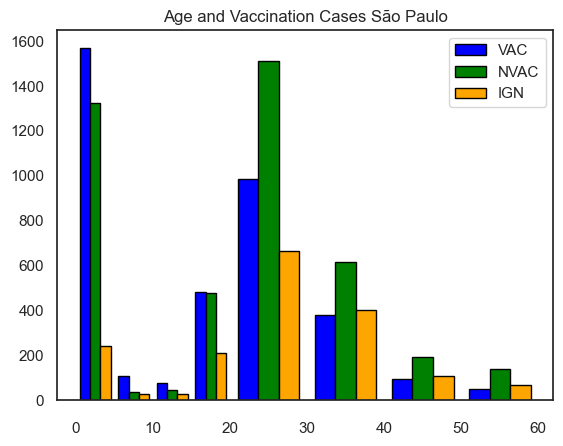

Considering ignored are vaccinated
4.550250211619962 0.32084189600543644
EXCLUDING IGNORED FROM SAMPLE
[0.94357015 0.97231378 0.95541401 0.93478887 0.91068507 0.91036689
 0.89423373 0.8704275 ]
7.135722808745256 0.3995761636294053


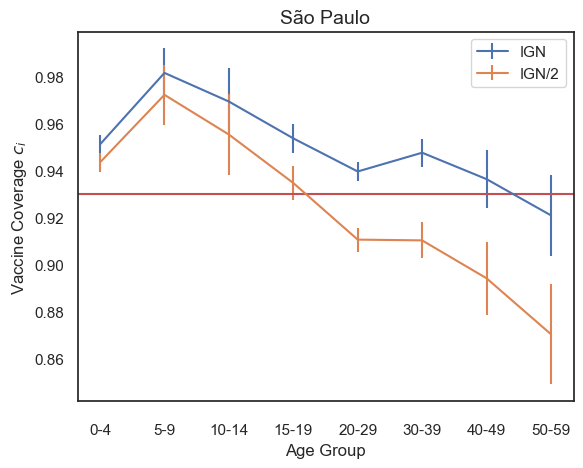

12396372


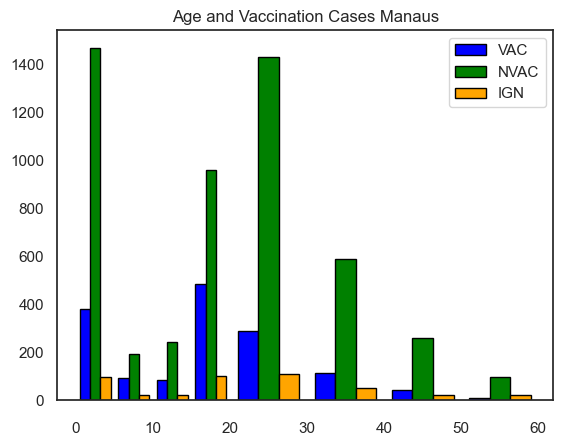

Considering ignored are vaccinated
16.308745782028925 0.596606735024469
EXCLUDING IGNORED FROM SAMPLE
[0.80097428 0.88034188 0.84056399 0.88254585 0.76540677 0.76259671
 0.73107798 0.70016474]
19.654801427302683 0.651811062775568


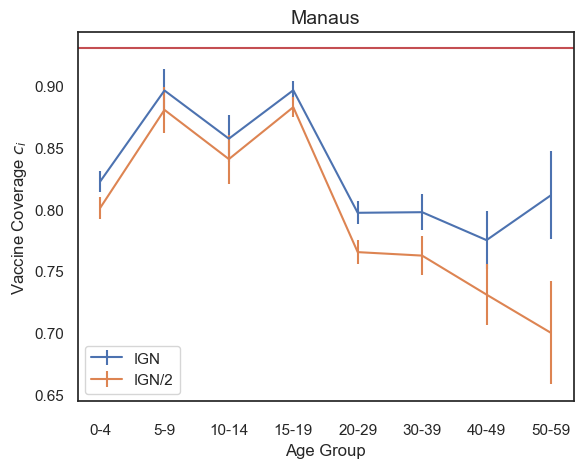

2255903


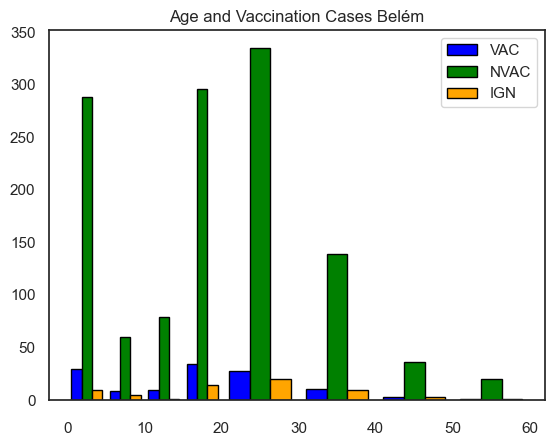

Considering ignored are vaccinated
28.607561562192508 1.8641891739748173
EXCLUDING IGNORED FROM SAMPLE
[0.62065771 0.70588235 0.63060073 0.65905803 0.6050695  0.59075168
 0.63157895 0.51107325]
33.66445146538173 1.928237670948297


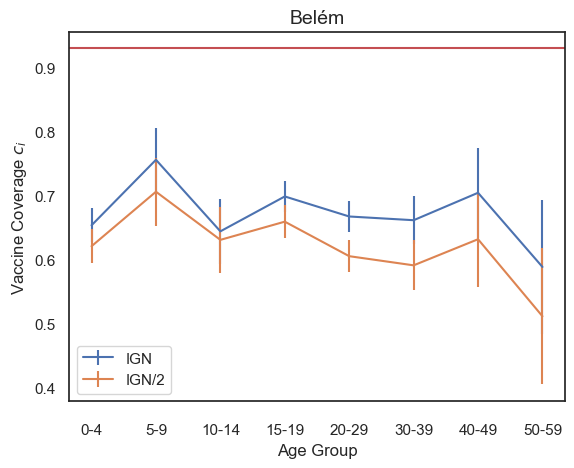

1506420


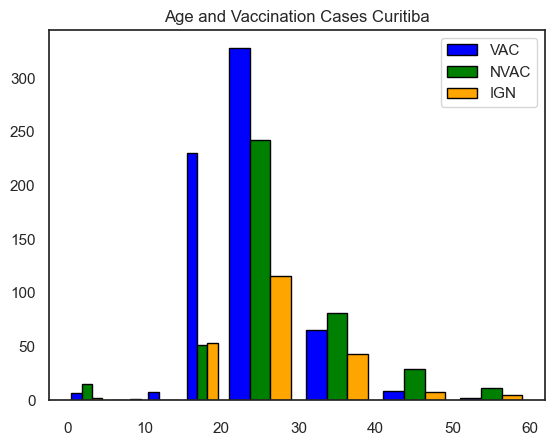

Considering ignored are vaccinated
5.297357879671928 1.2893449423128789
EXCLUDING IGNORED FROM SAMPLE
[0.86206897 0.93457944 1.         0.97928796 0.94842114 0.92340539
 0.83484574 0.81466395]
8.086133301545058 2.122616741274491


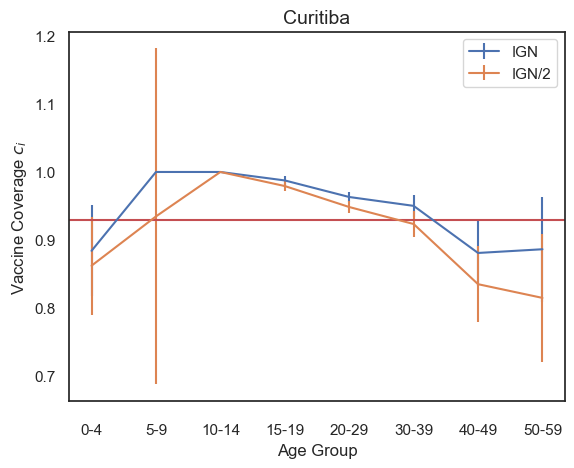

1963726


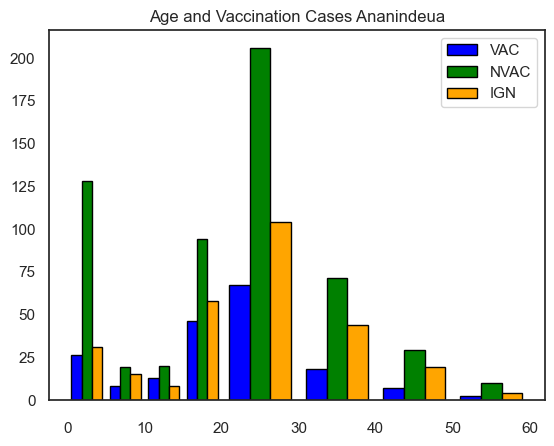

Considering ignored are vaccinated
7.00428028011602 1.1428231647204998
EXCLUDING IGNORED FROM SAMPLE
[0.80512174 0.89311438 0.91006424 0.89702189 0.86823289 0.8600301
 0.85959885 0.82644628]
12.107242133093324 1.4534044972831484


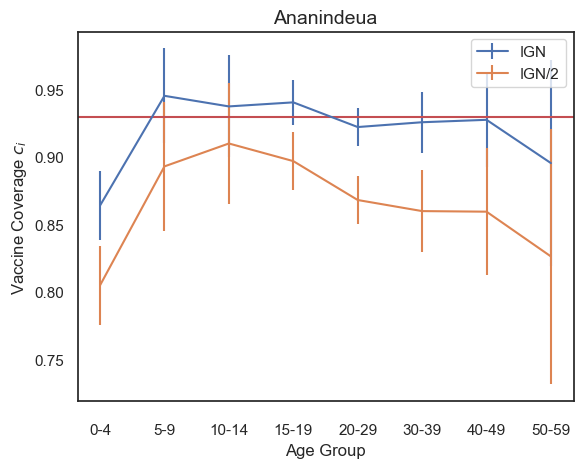

540410


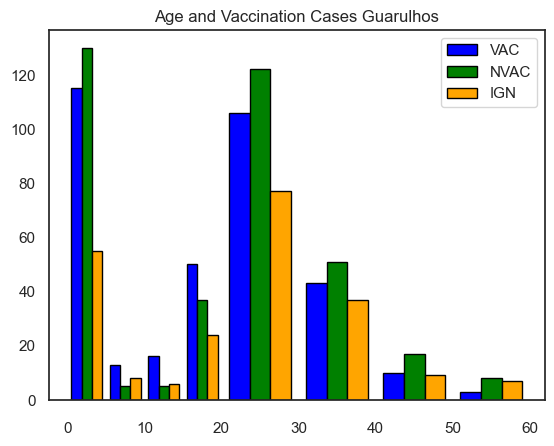

Considering ignored are vaccinated
3.7228379574910546 0.9383361573139768
EXCLUDING IGNORED FROM SAMPLE
[0.92818759 0.96426546 0.97137014 0.94757756 0.92785822 0.92669329
 0.90596689 0.88980151]
6.345056709332312 1.240487082786527


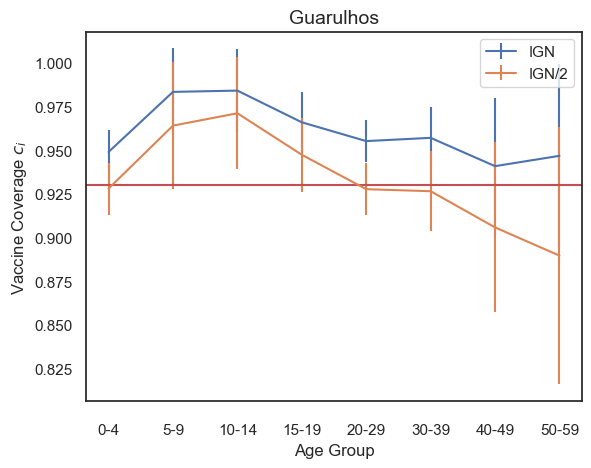

1404694


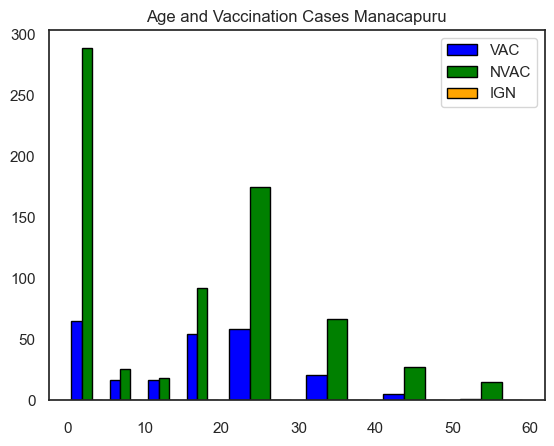

Considering ignored are vaccinated
18.075519419823127 1.6662742826228303
EXCLUDING IGNORED FROM SAMPLE
[0.76264226 0.90140845 0.92699884 0.89344805 0.82562278 0.81234768
 0.7256894  0.48780488]
18.075519419823127 1.6662742826228303


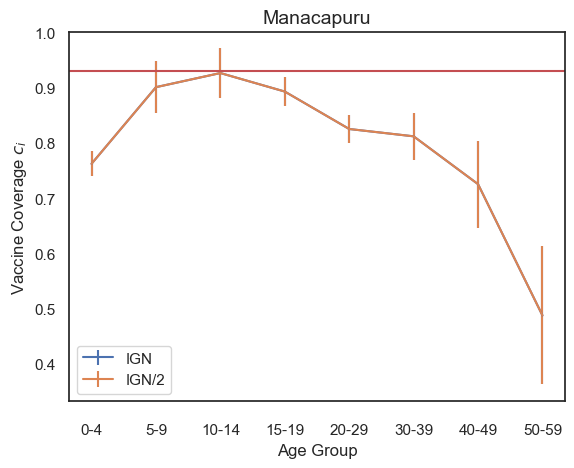

99613


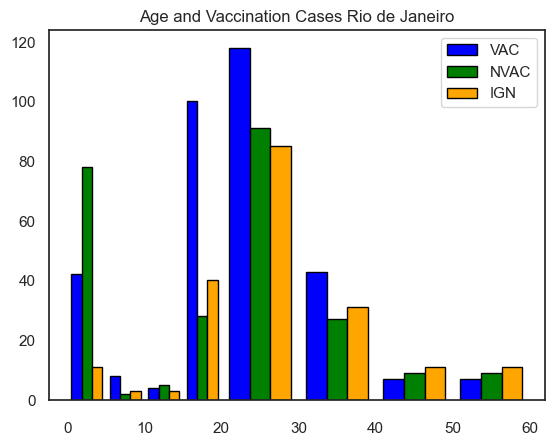

Considering ignored are vaccinated
2.725565015922446 0.8369279576291285
EXCLUDING IGNORED FROM SAMPLE
[0.89043022 0.9748589  0.92359362 0.97276265 0.94497925 0.95160634
 0.92489826 0.92489826]
4.968757435069304 1.1688246105126834


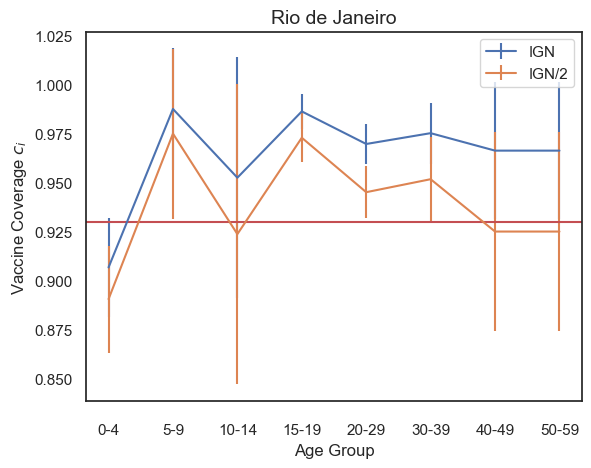

6775561


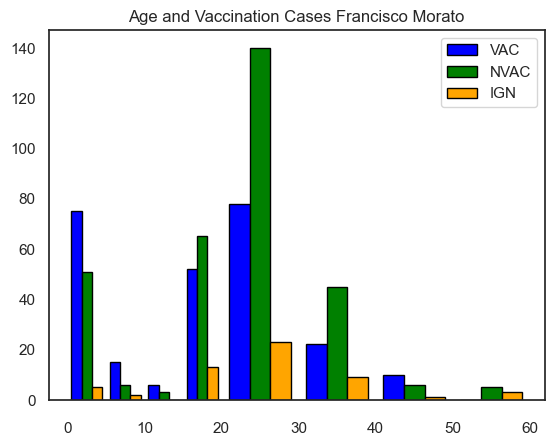

Considering ignored are vaccinated
5.896621691263329 1.5028259326822664
EXCLUDING IGNORED FROM SAMPLE
[0.95390486 0.97028502 0.96618357 0.92118731 0.89406124 0.88436509
 0.95846645 0.76726343]
8.106359954383858 1.8633062296570022


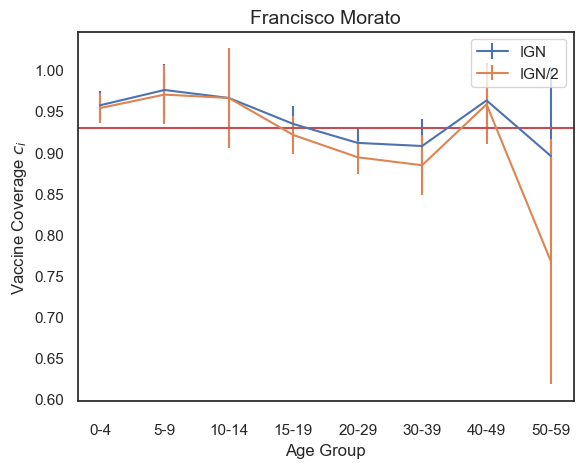

179372


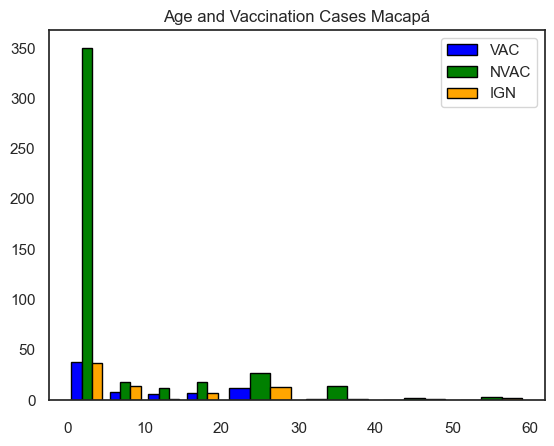

Considering ignored are vaccinated
13.572528877221792 3.512863901411958
EXCLUDING IGNORED FROM SAMPLE
[0.68655447 0.89552239 0.88135593 0.87463557 0.887503   0.59642147
 0.74074074 0.78125   ]
19.91494436136992 4.354190617127962


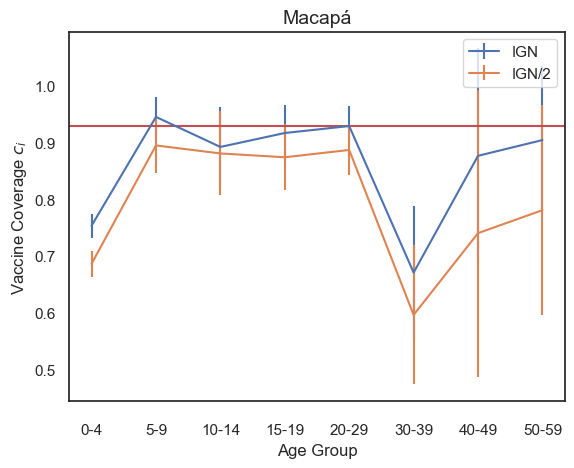

522357


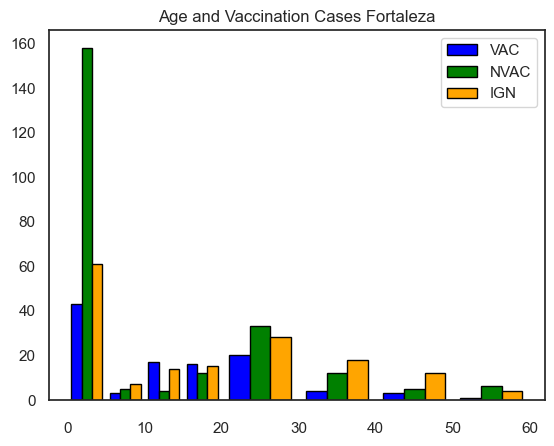

Considering ignored are vaccinated
3.6768731898583704 1.2946044712168927
EXCLUDING IGNORED FROM SAMPLE
[0.84779976 0.91613813 0.96891401 0.94510356 0.91177259 0.8984105
 0.92118731 0.84269663]
8.242199769017416 1.9256187534924205


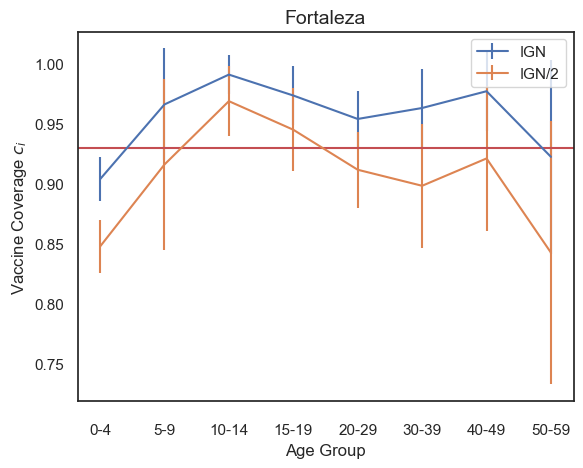

2703391


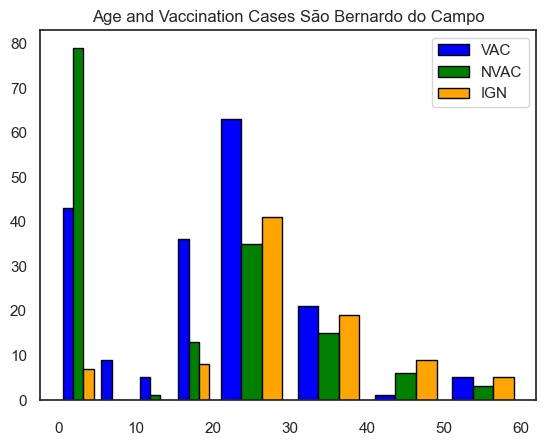

Considering ignored are vaccinated
2.465948945002012 1.0345860089569214
EXCLUDING IGNORED FROM SAMPLE
[0.88952654 1.         0.98619329 0.97110949 0.95554157 0.94676393
 0.88211708 0.95117311]
4.881513880725165 1.5697746194454916


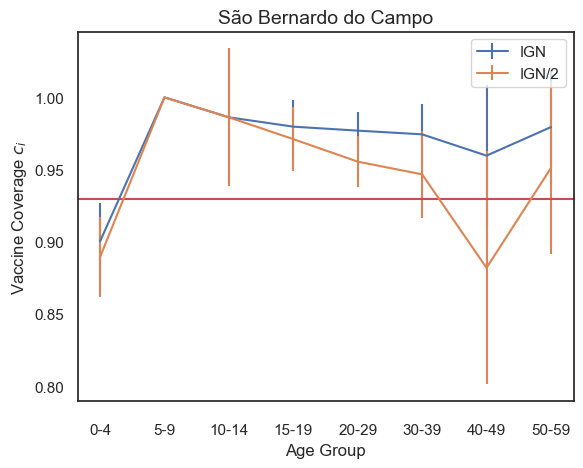

849874


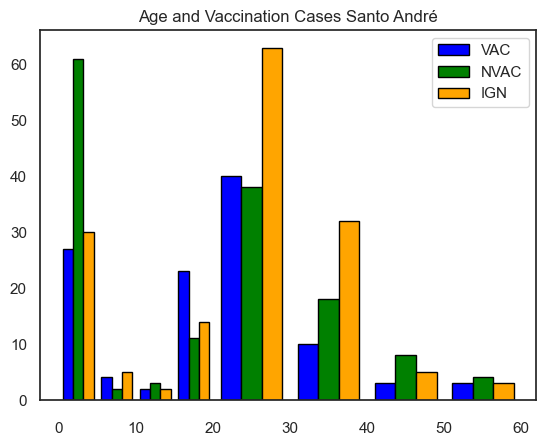

Considering ignored are vaccinated
3.267971859237776 1.4215024911449234
EXCLUDING IGNORED FROM SAMPLE
[0.88757396 0.95377843 0.91463415 0.9596929  0.9362928  0.91613813
 0.88211708 0.92118731]
6.661715857457884 1.907203352984969


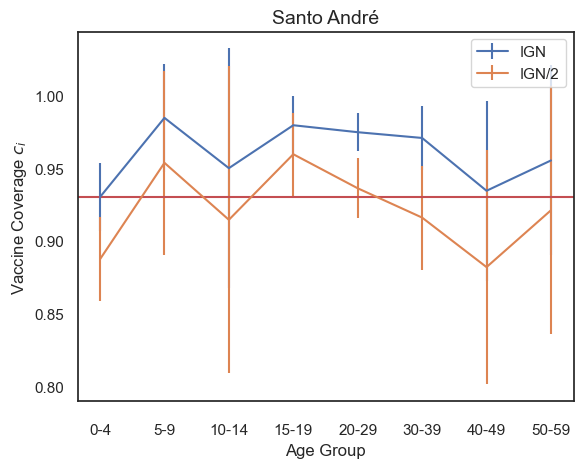

723889


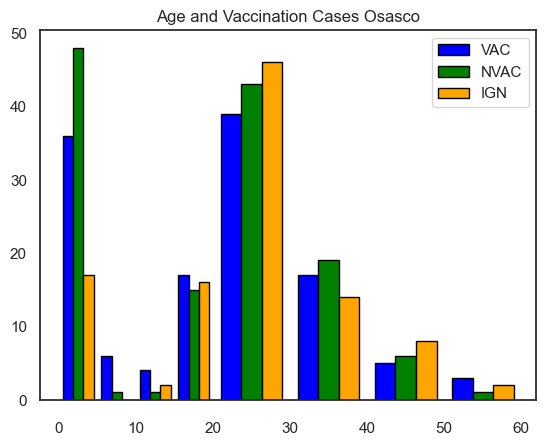

Considering ignored are vaccinated
2.586716651309603 1.0696147484026703
EXCLUDING IGNORED FROM SAMPLE
[0.91837788 0.98846787 0.97276265 0.93949643 0.93065146 0.92951201
 0.92783505 0.96618357]
4.899335526050772 1.5312334549792346


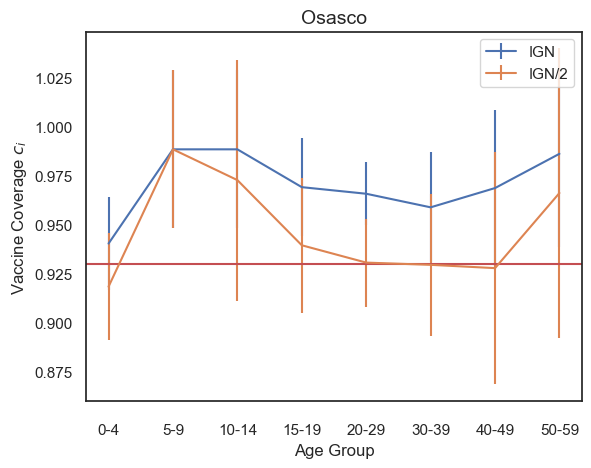

701428


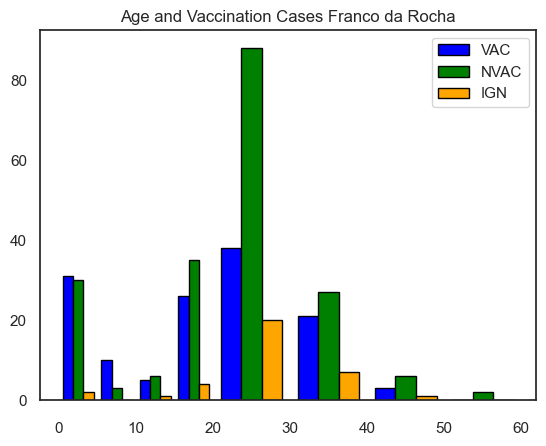

Considering ignored are vaccinated
15.722271861131341 1.6812229817881004
EXCLUDING IGNORED FROM SAMPLE
[0.936494   0.97943193 0.92359362 0.91533181 0.87495443 0.91984231
 0.88495575 0.        ]
16.977675156065903 1.8287828862778912


C:\Users\denise.cammarota\AppData\Local\Temp\ipykernel_11688\842528999.py:2: RuntimeWarning: divide by zero encountered in divide
  return (1 +((1-e)*((1/p) -1)))**-1


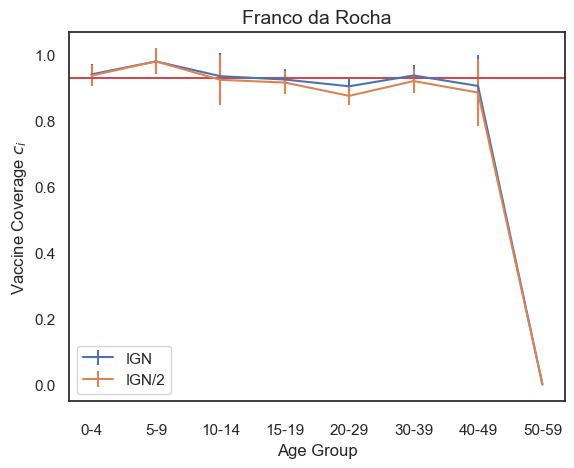

158438


In [30]:
first_10 = [355030., 130260., 150140., 410690., 150080., 351880., 130250.,
       330455., 351630., 160030.,230440.,354870.,354780.,353440.,351640.]

# data for municipalities by age
data_muns = pd.read_csv('../Data/age_groups_municipalities.csv')

# data of cases, age and their vaccination status
df_mun = pd.read_csv('../Data/analyzed/age_vaccine_municipalities.csv')
mun_path = '../Data/municipalities.csv'
mun_file = pd.read_csv(mun_path)
mun_file['codigo'] = mun_file['municipio'].astype(str).str[:6].astype(int)
mun_file = mun_file[['municipio','name','codigo']]
df_mun = df_mun.merge(mun_file, how = 'left', left_on = 'ID_MN_RESI', right_on = 'codigo')
df_pop = data_muns[['Municipio','Total']]

cov_1 = []
e_cov_1 = []
cov_2 = []
e_cov_2 = []

for mun in first_10:
    pop = df_pop[df_pop['Municipio'] == mun].iloc[0,1]
    df_tmp = df_mun[df_mun['ID_MN_RESI'] == mun]
    df_tmp = df_tmp[df_tmp['NU_IDADE_N'] <= 60]
    mun_name = df_tmp['name'].unique()[0]
    min_age = 0
    max_age = 60
    colors=['blue', 'green', 'orange']
    names=['VAC', 'NVAC', 'IGN']
    x_vac = list(df_tmp[df_tmp['CS_VACINA'] == 1]['NU_IDADE_N'])
    x_nvac = list(df_tmp[df_tmp['CS_VACINA'] == 2]['NU_IDADE_N'])
    x_ign = list(df_tmp[df_tmp['CS_VACINA'] == 9]['NU_IDADE_N'])
    bins_grouped = np.array([0,5,10,15,20,30,40,50,60])
    #bins_grouped = np.array([0,5,10,15,20,30,40])
    bins = plt.hist([x_vac, x_nvac, x_ign], color=colors, label=names, bins=bins_grouped,  edgecolor = 'black')
    plt.title('Age and Vaccination Cases '+ str(mun_name))
    plt.legend()
    plt.show()
    # CONSIDERING IGNORED ARE VACCINATED
    print('Considering ignored are vaccinated')
    vacs = bins[0][0]
    nvacs = bins[0][1]
    ign = bins[0][2]
    vacs_2 = vacs.copy()
    nvacs_2 = nvacs.copy()
    ign_2 = ign.copy()
    vacs = vacs + ign
    # first we calculate the proportion of vaccinated
    N = vacs+nvacs # sample size
    p_vacs = vacs/N # proportion of sample
    # now we calculate errors for these proportions 
    e_p_vacs = np.sqrt(p_vacs*(1 - p_vacs)/N)
    # second we propagate to calculate the vaccination coverage
    eps = 0.93 # vaccine efficacy
    c_vacs = coverage_age(p_vacs,eps)
    e_c_vacs = error_coverage_age(p_vacs,eps)*e_p_vacs
    # third we calculate S0 with its corresponding error
    data_sp = data_muns[data_muns['Municipio'] == mun]
    data_sp = data_sp.to_numpy()[0]
    pop_sp = data_sp[-1]
    data_sp = data_sp[2:10]
    gap_vacs = 1 - np.array(c_vacs)
    S0 = np.sum(data_sp*gap_vacs)
    e_S0 = np.sqrt(np.sum((data_sp*e_c_vacs)**2))
    print(100*S0/pop,100*e_S0/pop)
    # EXCLUDING IGNORED FROM SAMPLE
    print('EXCLUDING IGNORED FROM SAMPLE')
    vacs_2 = vacs_2 + ign_2/2
    nvacs_2 = nvacs_2 + ign_2/2
    N_2 = vacs_2 + nvacs_2 # sample size
    p_vacs_2 = vacs_2/N_2 # proportion of sample
    # now we calculate errors for these proportions 
    e_p_vacs_2 = np.sqrt(p_vacs_2*(1 - p_vacs_2)/N_2)
    # second we propagate to calculate the vaccination coverage
    eps = 0.93 # vaccine efficacy
    c_vacs_2 = coverage_age(p_vacs_2,eps)
    print(c_vacs_2)
    e_c_vacs_2 = error_coverage_age(p_vacs_2,eps)*e_p_vacs_2
    # third we calculate S0 with its corresponding error
    gap_vacs_2 = 1 - np.array(c_vacs_2)
    S0_2 = np.sum(data_sp*gap_vacs_2)
    e_S0_2 = np.sqrt(np.sum((data_sp*e_c_vacs_2)**2))
    print(100*S0_2/pop,100*e_S0_2/pop)
    # NOW PLOTTING BOTH VACCINATION COVERAGES
    fig, ax = plt.subplots()
    ax.errorbar(np.arange(len(c_vacs)),c_vacs, yerr = e_c_vacs, label = 'IGN')
    ax.errorbar(np.arange(len(c_vacs_2)),c_vacs_2, yerr = e_c_vacs_2, label = 'IGN/2')
    ax.set_xticks(np.arange(len(p_vacs)))
    ax.set_xticklabels(['0-4','5-9','10-14','15-19', '20-29', '30-39','40-49','50-59'])
    ax.axhline(0.93,color = 'r')
    ax.set_xlabel('Age Group')
    ax.set_ylabel('Vaccine Coverage '+r'$c_i$')
    plt.title(mun_name, fontsize = 14)
    plt.legend()
    plt.show()
    print(pop_sp)
    cov_1.append(c_vacs)
    e_cov_1.append(e_c_vacs)
    cov_2.append(c_vacs_2)
    e_cov_2.append(e_c_vacs_2)

## Plotting for paper

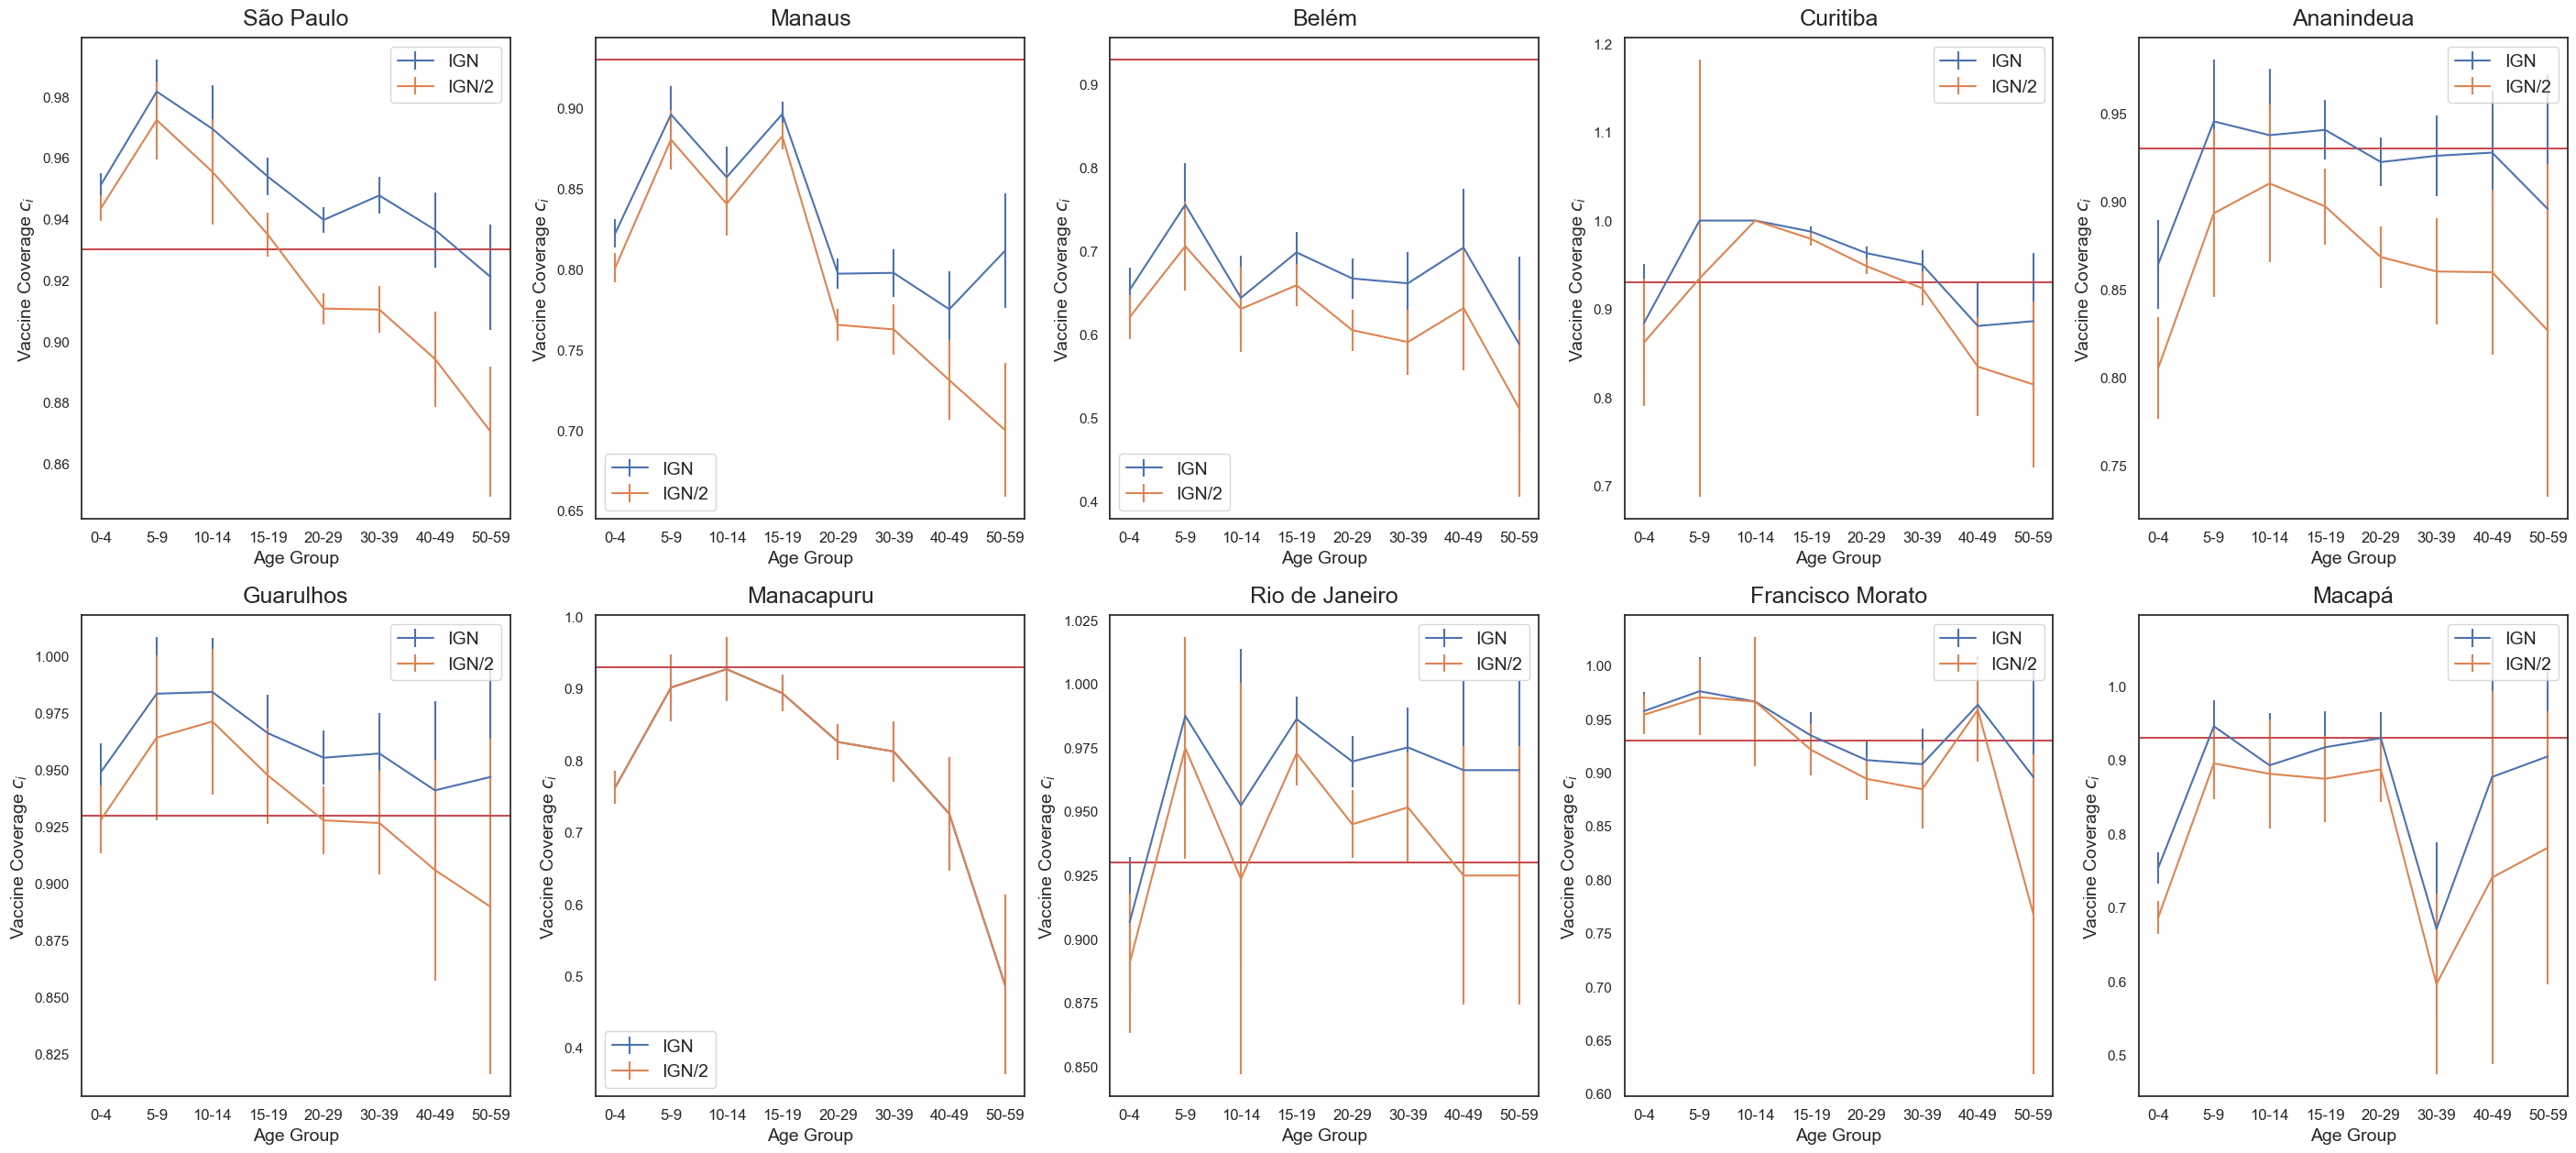

In [6]:
c = 0
fig, ax = plt.subplots(2,5,figsize = (35,15))
muns_name = ['São Paulo','Manaus','Belém','Curitiba','Ananindeua','Guarulhos','Manacapuru', 'Rio de Janeiro', 'Francisco Morato', 'Macapá']
mpl.rcParams['xtick.major.pad'] = 10
mpl.rcParams['xtick.minor.pad'] = 10

for i in range(2):
    for j in range(5):
        ax[i,j].errorbar(np.arange(len(cov_1[c])),cov_1[c], yerr = e_cov_1[c], label = 'IGN')
        ax[i,j].errorbar(np.arange(len(cov_2[c])),cov_2[c], yerr = e_cov_2[c], label = 'IGN/2')
        ax[i,j].set_xticks(np.arange(len(p_vacs)))
        ax[i,j].set_xticklabels(['0-4','5-9','10-14','15-19', '20-29', '30-39','40-49','50-59'], fontsize = 12)
        ax[i,j].axhline(0.93,color = 'r')
        ax[i,j].set_ylabel('Vaccine Coverage '+r'$c_i$',fontsize = 14)
        ax[i,j].set_ylabel('Vaccine Coverage '+r'$c_i$', fontsize = 14)
        ax[i,j].set_xlabel('Age Group', fontsize = 14)
        ax[i,j].set_title(muns_name[c], fontsize = 18, pad = 10)
        ax[i,j].legend(fontsize = 14)
        c = c + 1
plt.savefig('../Figs/subplots_coverage_plot.pdf',bbox_inches='tight')